## An exemple: insertion sort

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif" style="width:50%; float:center">

The code to implement a insertion sort algorithm on top of numpy array

In [29]:
import numpy as np
def insertion_sort(ar, key = lambda x: x):
    ar = ar.copy()
    previous = ar[0]
    for i in range(1, len(ar)): # O(n)
        if key(ar[i]) < key(previous):
            el = ar.pop(i) # O(n - i)
            for insertion_index in range(len(ar)): # O(i)
                if key(ar[insertion_index]) >= key(el):
                    break
            ar.insert(insertion_index, el) # O(n - i)
        else:  
            previous = ar[i]
    return ar

# C = O(n) * ((2*O(n - i) + O(i))) = O(n²)

ar = list(np.random.randint(1, 100, 10))
print(ar)
insertion_sort(ar)

[63, 45, 46, 68, 73, 99, 7, 7, 84, 3]


[3, 7, 7, 45, 46, 63, 68, 73, 84, 99]

We are now plotting the complexity size of the container VS insertion sort time

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:39<00:00,  1.01it/s]


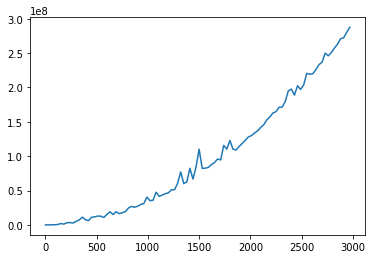

In [30]:
import numpy as np
from time import time_ns
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 10
N = 3000
step = 30
times_v1 = np.zeros((N//step, k))
for i in tqdm(range(1, N, step)):
    for j in range(k):
        ar = list(np.random.randint(1, 100, i))
        t0 = time_ns()
        insertion_sort(ar)
        times_v1[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times_v1, axis=1))

La courbe représente en abscisses la taille de la liste et en ordonnée le temps que le tri par sélection prend.
On observe que plus la taille de la liste augmente plus le temps d'exécution de l'algorithme augmente.

We will now compare with the Python sorted function

100%|██████████| 100/100 [00:00<00:00, 236.81it/s]


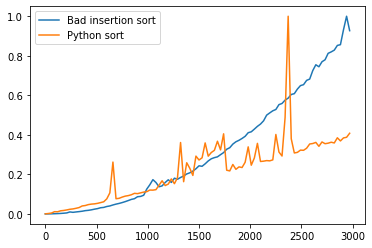

In [7]:
k = 10
N_default = 3000
step = 30
times_default = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(np.random.randint(1, 100, i))
        t0 = time_ns()
        sorted(ar)
        times_default[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times_v1, axis=1)/np.max(np.mean(times_v1, axis=1)), label="Bad insertion sort")
plt.plot(np.arange(N_default//step)*step, np.mean(times_default, axis=1)/np.max(np.mean(times_default, axis=1)), label="Python sort")
plt.legend()

On remarque que pour une taille de liste plus petite que 1000 environ, le tri par défaut de python est moins rapide alors que pour des valeur plus grande que 1000 le tri par défaut de python devient beaucoup plus rapide. Cela montre que le programme du tri par insertion que nous avons nous-même codé n'est pas optimal.

Testing a merge k-sorted list algorithm  

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Loser_tree_merge.gif" style="width:50%; float:center">

In [31]:
from bisect import bisect_left

def insertion_sort3(ar, key = lambda x: x):
    ar = ar.copy()
    previous = ar[0]
    for i in range(1, len(ar)): # O(n)
        if key(ar[i]) < key(previous):
            el = ar[i]
            j = bisect_left(ar, el, lo=0, hi=i) # O(log(i))
            ar[j], ar[j+1:i+1] = el, ar[j:i] # O(i - j)
        else:
            previous = ar[i]
    return ar

# C = O(n²)

ar = list(np.random.randint(1, 100, 10))
insertion_sort3(ar)

[1, 6, 18, 45, 58, 68, 72, 72, 83, 91]

We compare with our previous implementation

In [32]:
ar = list(np.random.randint(1, 100, 1000))
%timeit insertion_sort(ar.copy())
%timeit insertion_sort3(ar.copy())

35.5 ms ± 4.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.56 ms ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


We now compare with previous results

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:09<00:00, 10.77it/s]


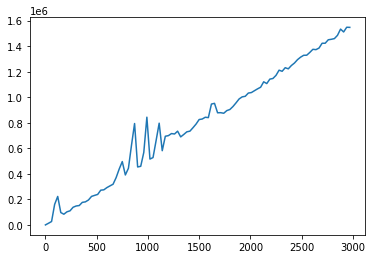

In [33]:
import numpy as np
from time import time_ns
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 100
N = 3000
step = 30
n_errors = 10
times = np.zeros((N//step, k))
for i in tqdm(range(1, N, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        t0 = time_ns()
        insertion_sort3(ar)
        times[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times, axis=1))

100%|██████████| 100/100 [00:01<00:00, 75.66it/s]


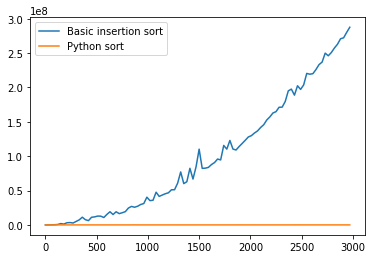

In [34]:
k = 100
N_default = 3000
step = 30
n_errors = 10
times_default = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        t0 = time_ns()
        sorted(ar)
        times_default[i//step, j] = time_ns() - t0
        
plt.plot(np.arange(N//step)*step, np.mean(times_v1, axis=1), label="Basic insertion sort")
#plt.plot(np.arange(N//step)*step, np.mean(times, axis=1), label="Better insertion sort")
plt.plot(np.arange(N_default//step)*step, np.mean(times_default, axis=1), label="Python sort")
plt.legend()

il faut que les données d'entrée soit la même si on veut comparer des amgorithmes entre eux. Par exemple pour le tri sorted de python en haut on a utilisé des listes fortement mélangé alors qu'ici les données d'entrée sont faiblement trié donc ici il va beacoup plus vite alors qu'on haut l'algo par défaut de python prend plus de temps alors que c'est le même algrithme.

Should we change the container ?

We try with a sorted dictionnary

100%|██████████| 1000/1000 [03:20<00:00,  5.00it/s]


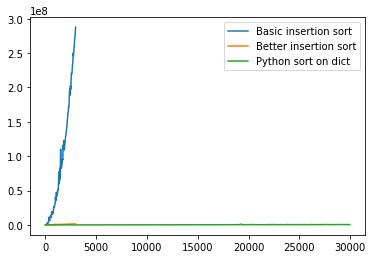

In [37]:
k = 100
N_default = 30000
step = 30
n_errors = 10
times_dict = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        res_dict = {ar[j] : ar[j] for j in range(i)}
        t0 = time_ns()
        sorted(res_dict)
        times_dict[i//step, j] = time_ns() - t0
        
plt.plot(np.arange(N//step)*step, np.mean(times_v1, axis=1), label="Basic insertion sort")
plt.plot(np.arange(N//step)*step, np.mean(times, axis=1), label="Better insertion sort")
#plt.plot(np.arange(N_default//step)*step, np.mean(times_default, axis=1), label="Python sort")


A refaire
plt.plot(np.arange(N_default//step)*step, np.mean(times_dict, axis=1), label="Python sort on dict")
plt.legend()

# Parallel sort Algorithms

100%|██████████| 100/100 [00:03<00:00, 29.17it/s]


Text(0.5, 1.0, 'Numba vs Python pur')

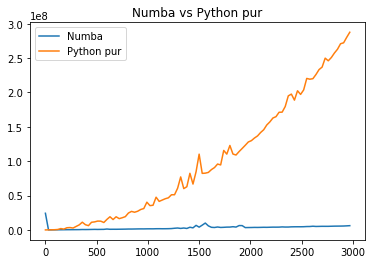

In [49]:
import numba as numba


@numba.njit
def insertion_sort_numba(ar):
    ar = ar.copy()
    n = len(ar)
    for i in numba.prange(1, n):
        key_item = ar[i]
        j = i - 1
        while j >= 0 and ar[j] > key_item:
            ar[j + 1] = ar[j]
            j -= 1
        ar[j + 1] = key_item
    return ar

'''
@numba.njit
def insertion_sort_parallel(ar):
    ar = np.array(ar.copy())
    previous = ar[0]
    for i in range(1, len(ar)): # O(n)
        if ar[i] < previous:
            el = ar[i]
            ar = np.delete(ar, i)

            insertion_index = 0
            for j in range(len(ar)): # O(i)
                if ar[j] >= el:
                    insertion_index = j
                    break
            ar = np.insert(ar, insertion_index, el)
            previous = ar[i] if i < len(ar) else previous

        else:  
            previous = ar[i]
    return ar
'''

k = 10
N = 3000
step = 30
times_v2 = np.zeros((N//step, k))
for i in tqdm(range(1, N, step)):
    for j in range(k):
        ar = list(np.random.randint(1, 100, i))
        t0 = time_ns()
        insertion_sort_numba(ar)
        times_v2[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times_v2, axis=1), label="Numba")
plt.plot(np.arange(N//step)*step, np.mean(times_v1, axis=1), label="Python pur")
plt.legend()
plt.title("Numba vs Python pur")


Nous remarquons que le fait de paralléliser l'algorithme de tri par sélection a considérablement augmenter l'efficacité de l'algorithme en question comme le montre le grpahe ci-dessus. On remarque également que pour des listes de petites tailles la complexité de l'algo en séquentiel est meilleure que celle de l'qlgo en pqrqllèle. Effectivement, pour de petites listes, le cout pour réaliser le parallélisme est bcp plus élevé que les gains obtenus. Vu que le tri est rapide, le fait de créer des threads et d'utiliser plus de couerus sur le CPU consomme plus que le gain obtneue. Les petits piics sont dus au hasard et probablement au cache precedent. en effet, plus le nombre d elements non tries dans une liste est grand plus il est dur de le trier (d'ou les bosses ou le melange des nombre est plus élevé).